# LVM Data Simulator tutorial: exposure time calculator

**This is a tutorial on how run the simulator to estimate the exposure time needed to reach a signal to noise at a specific wavelength.**
- How to install the simulator and how to prepare a custom simulation is shown in [tutorial #1](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial1.ipynb)
- More details on the setup of LVM instrumentation and on the structure of the outputs of the simulator are given in [tutorial #2](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial2.ipynb)
- More realistic and useful simulations are considered in [tutorial #3](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial3.ipynb) - please go there if you have already installed and configured the package and want to learn how to simulate the source field in more details.
- If you are interested in producing Raw LVM data (as input for DRP) - please go to [tutorial #5](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial5.ipynb) describing 2D simulator
_Last update: 2023/02/27_

We assumed lvmdatasimulator has been installed following [tutorial #1](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial1.ipynb). As usual, move this file to an empty directory, or set-up the working directory as follows:

In [1]:
# === Don't forget to set up your work directory (not valid for running on UTAH cluster)
import os
# os.chdir('/Users/mors/Science/LVM/Simulator_example/')

## Setting up the ETC

This simulator can be easily used to estimate the required LVM exposure time to obtain a certain signal-to-noise ratio (S/N) for a simple source configuration. It simulates only the central fiber of the array, and provide plots showing how the S/N changes as a function of exposure time. For complex scenarios, a full simulation should be run following instructions on the other tutorials.

This ETC will simulate only nebulae with:
- uniform brightness distribution
- constant emission line ratios (defined by one of the pre-computed Cloudy models)
- or/and constant level and shape of the continuum.
On top of this a star with particular properties also can be part of the object under evaluation. Nebular component, continuum from the object and the stellar spectrum will be combined together by the simulator in a single fiber, for which we will run the calculations.

**N.B.: the resulting S/N ratio is the value measured per spectral pixel (0.5A) in the output spectra at a particular wavelength. This simplified ETC doesn't integrate the emission lines and do not subtract the underlying continuum but rather estimate the S/N in the pixel at the center of the line.**

**N.B.2: All calculations are performed assuming a single exposure.**

In [2]:
from lvmdatasimulator.run import run_lvm_etc

The first step is to define the parameters of your nebula. The only required parameter is 'max_brightness' (in erg/s/cm\^2/arcsec^2).
See [tutorial #3](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial3.ipynb) if you want to learm how to specify the spectral properties (emission and continuum) of the nebula.

In [3]:
neb_params = {'max_brightness': 1e-16, 'model_id': 'Shell_3', 'model_type': 'cloudy'}

Also you may define parameters of the star if you want to put it in the fiber. It should be a dictionary containing the magnitude and temperature of the desired star, as follows:

In [4]:
star_params = {'gmag': [15], 'teff': [15000]}

Other parameters can be passed to the simulator in general (see [tutorial #3](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial3.ipynb)), but only these two should be used when running the ETC. Also note that the parameters must be provided as lists.

The dictionary below (``params``) is the main input for the ETC. It joins together the parameters of the nebula and the star, and also can contain parameters defining the observations (see [tutorial 2](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial2.ipynb)). As a default, the simulation is run at an airmass of 1.5 and in dark conditions (0 days from new moon). These conditions can be adjusted by providing the ``airmass`` and ``days_moon`` parameters in the ``params`` dictionary, as shown below. It is also possible to provide a custoim sky spectrum via the ``sky_template`` parameter, as described in [tutorial 2](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial2.ipynb). 

Other parameters can be provided to the ETC:
- ``check_lines`` - list of the lines (wavelength in A, float) for which ETC will check the dependence of the S/N on the exposure time.
- ``desired_snr`` - if provided, then ETC will print (and return) the required exposures to reach the target S/N at the respective wavelength.
- ``continuum`` - bool (default is False). It defines how the S/N ratio will be calculated. If it is true, then the code assumes we are interested in the S/N in the continuum rather then in emission lines - then the S/N average S/N in a ±``dlam`` window centered on the position provided in ``check_lines`` will be provided. Otherwise, the code assumes the measurements in emission lines, and thus the S/N is measured by integrating the signal and estimating the noise in the ±``dlam`` aperture around the wavelengths in ``check_lines``.
- ``delete`` - bool (default is True). If this parameter is set to True, all the files produced during the simulations will be deleted. If you want to keep all the output, please set ``delete`` to False.
- ``dlam`` - float (default is 1). It is used to define the interval considered when computing the S/N for each position.

[INFO]: Start simulations in exposure time calculator mode for 1 nebula and 1 star 
[INFO]: Start generating 1 nebulae
[INFO]: Generated ISM saved to ./ETC_my_test_object/test.fits
[INFO]: ISM content saved to test.fits
[WARNING]: A star is included in the simulation. The S/N estimate might not be reliable 
or the ETC could crash if the considered lines sit on top of an absorption lines.
[INFO]: star 1 with Teff 15000, Gmag 15.00 and velocity 0 added at position (10 , -10)
[INFO]: Transforming world coordinates to pixel coordinates
[INFO]: Associating spectra to stars using library pollux_resampled_v0.fits...
[INFO]: Rescaling 1 synthetic spectra.
[INFO]: Using only the central fiber.
[INFO]: Simulating observations.
[INFO]: Reading the atmospheric extinction from file.


[INFO]: Resample extinction file to instrument wavelength solution.
[INFO]: Simulating the sky emission 2 days from new moon.
[INFO]: Using sky file: /home/econgiu/Data/LVM/lvmdatasimulator/data/sky/LVM_LVM160_SKY_2.dat
[INFO]: Resample sky emission to instrument wavelength solution.
[INFO]: Recovering target spectra for 1 fibers.
[INFO]: Start extracting nebular spectra
[INFO]: Resampling spectra to the instrument wavelength solution.
[INFO]: Saving the outputs:
[INFO]: Input spectra
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_input.fits saved.
[INFO]: Clean outputs
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_10_no_noise.fits saved.
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_19_no_noise.fits saved.
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_37_no_noise.fits saved.
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_70_no_noise.fits saved.
[INFO]: ./ETC_my_te

To reach S/N=30 in line = 6563.0±1A we need 857s of single exposure
To reach S/N=10 in line = 6717.0±1A we need 2403s of single exposure
To reach S/N=15 in line = 4861.0±1A we need 1507s of single exposure


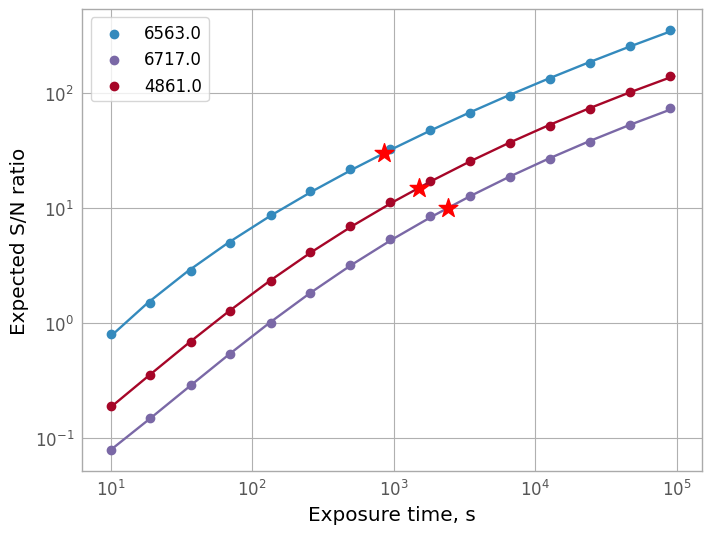

[INFO]: Deleting output directory



Elapsed time: 11.7s


[857, 2403, 1507]

In [5]:
params = {'name': 'ETC_my_test_object',
          'nebula': neb_params,
          'star': star_params,
          'airmass': 1.2,
          'days_moon': 2,
          }


run_lvm_etc(params, check_lines=[6563., 6717., 4861.], desired_snr=[30, 10, 15], continuum=False)

### Advanced options

If one is interested on a specific set of exposure times, it is possible to carry on the simulation only for a specific set of exposure times. In this case, the code will provide a plot showing the signal, the error, and the S/N recovered for each considered exposure time.

It is possible to provide the list of exposure times (in s) via the ``exptimes`` keyword in the ``params`` dictionary, as follows:


[INFO]: Start simulations in exposure time calculator mode for 1 nebula and 1 star 
[INFO]: Start generating 1 nebulae
[INFO]: Generated ISM saved to ./ETC_my_test_object/test.fits
[INFO]: ISM content saved to test.fits
[WARNING]: A star is included in the simulation. The S/N estimate might not be reliable 
or the ETC could crash if the considered lines sit on top of an absorption lines.
[INFO]: star 1 with Teff 15000, Gmag 15.00 and velocity 0 added at position (10 , -10)
[INFO]: Transforming world coordinates to pixel coordinates
[INFO]: Associating spectra to stars using library pollux_resampled_v0.fits...
[INFO]: Rescaling 1 synthetic spectra.
[INFO]: Using only the central fiber.
[INFO]: Simulating observations.
[INFO]: Reading the atmospheric extinction from file.


[INFO]: Resample extinction file to instrument wavelength solution.
[INFO]: Simulating the sky emission 2 days from new moon.
[INFO]: Using sky file: /home/econgiu/Data/LVM/lvmdatasimulator/data/sky/LVM_LVM160_SKY_2.dat
[INFO]: Resample sky emission to instrument wavelength solution.
[INFO]: Recovering target spectra for 1 fibers.
[INFO]: Start extracting nebular spectra
[INFO]: Resampling spectra to the instrument wavelength solution.
[INFO]: Saving the outputs:
[INFO]: Input spectra
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_input.fits saved.
[INFO]: Clean outputs
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_900_no_noise.fits saved.
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_3600_no_noise.fits saved.
[INFO]: Uncalibrated outputs
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_900_realization.fits saved.
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_3600_re

The S/N reached in a 900s exposure in line = 6563.0±1A is 31.76
The S/N reached in a 900s exposure in line = 6717.0±1A is 5.13
The S/N reached in a 900s exposure in line = 4861.0±1A is 10.86


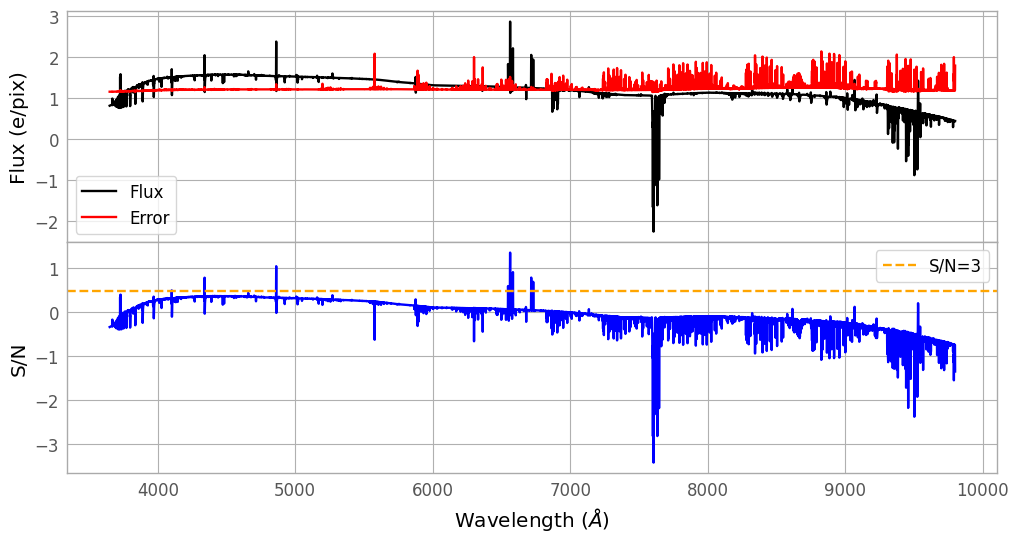

The S/N reached in a 3600s exposure in line = 6563.0±1A is 68.35
The S/N reached in a 3600s exposure in line = 6717.0±1A is 13.07
The S/N reached in a 3600s exposure in line = 4861.0±1A is 25.99


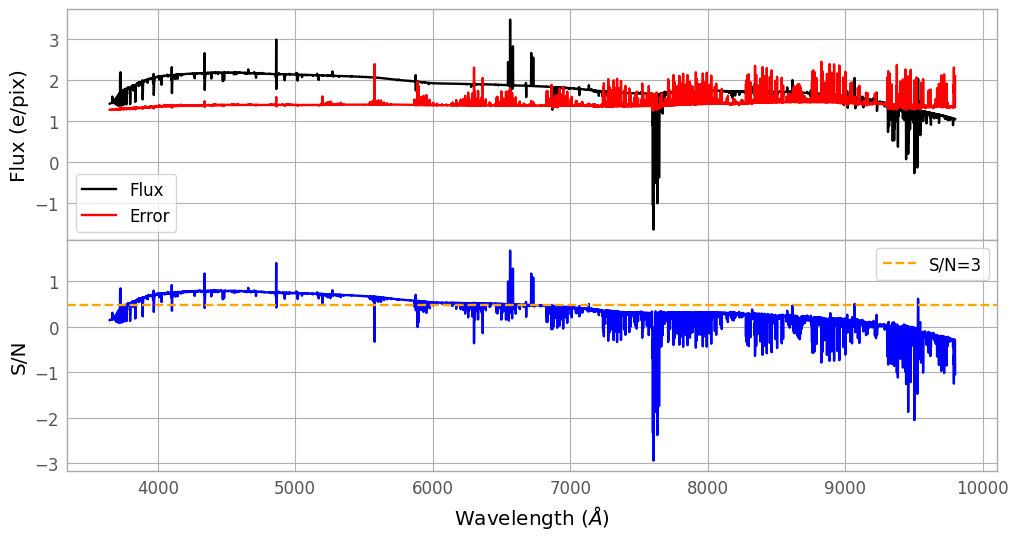

[INFO]: Deleting output directory



Elapsed time: 5.3s


[]

In [6]:
params = {'name': 'ETC_my_test_object',
          'nebula': neb_params,
          'star': star_params,
          'airmass': 1.2,
          'days_moon': 2,
          'exptimes': [900, 3600]
          }


run_lvm_etc(params, check_lines=[6563., 6717., 4861.], desired_snr=[30, 10, 15], continuum=False)

Finally, it is now possible to apply extinction during a run of the ETC. The extinction can be provided either as A(V), via the ``Av`` keyword of the ``params`` dictionary, or as E(B-V), via the ``ebv`` keyword. Internally, a standard Rv=3.1 is used to perform the conversion between E(B-V) and A(V) and a standard CCM extinction law is assumed.

The extinction is applied by creating a "dark nebula" (see [tutorial 3](https://github.com/sdss/lvmdatasimulator/blob/main/examples/LVM_data_simulator_tutorial3.ipynb)) in front of the uniform emission assumed by the ETC. 

[INFO]: Start simulations in exposure time calculator mode for 1 nebula and 1 star 
[INFO]: Adding extinction: A(V) = 1.00 mag
[INFO]: Start generating 2 nebulae
[INFO]: Generated ISM saved to ./ETC_my_test_object/test.fits
[INFO]: ISM content saved to test.fits
[WARNING]: A star is included in the simulation. The S/N estimate might not be reliable 
or the ETC could crash if the considered lines sit on top of an absorption lines.
[INFO]: star 1 with Teff 15000, Gmag 15.00 and velocity 0 added at position (10 , -10)
[INFO]: Transforming world coordinates to pixel coordinates
[INFO]: Associating spectra to stars using library pollux_resampled_v0.fits...
[INFO]: Rescaling 1 synthetic spectra.
[INFO]: Using only the central fiber.
[INFO]: Simulating observations.
[INFO]: Reading the atmospheric extinction from file.


[INFO]: Resample extinction file to instrument wavelength solution.
[INFO]: Simulating the sky emission 2 days from new moon.
[INFO]: Using sky file: /home/econgiu/Data/LVM/lvmdatasimulator/data/sky/LVM_LVM160_SKY_2.dat
[INFO]: Resample sky emission to instrument wavelength solution.
[INFO]: Recovering target spectra for 1 fibers.
[INFO]: Start extracting nebular spectra
[INFO]: Resampling spectra to the instrument wavelength solution.
[INFO]: Saving the outputs:
[INFO]: Input spectra
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_input.fits saved.
[INFO]: Clean outputs
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_900_no_noise.fits saved.
[INFO]: Uncalibrated outputs
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_900_realization.fits saved.
[INFO]: Calibrated outputs
[INFO]: ./ETC_my_test_object/outputs/ETC_my_test_object_linear_central_900_flux.fits saved.
[INFO]: Saving input ETC parameters to ETC_my_test_objec

The S/N reached in a 900s exposure in line = 6563.0±1A is 18.18
The S/N reached in a 900s exposure in line = 6717.0±1A is 2.58
The S/N reached in a 900s exposure in line = 4861.0±1A is 3.54


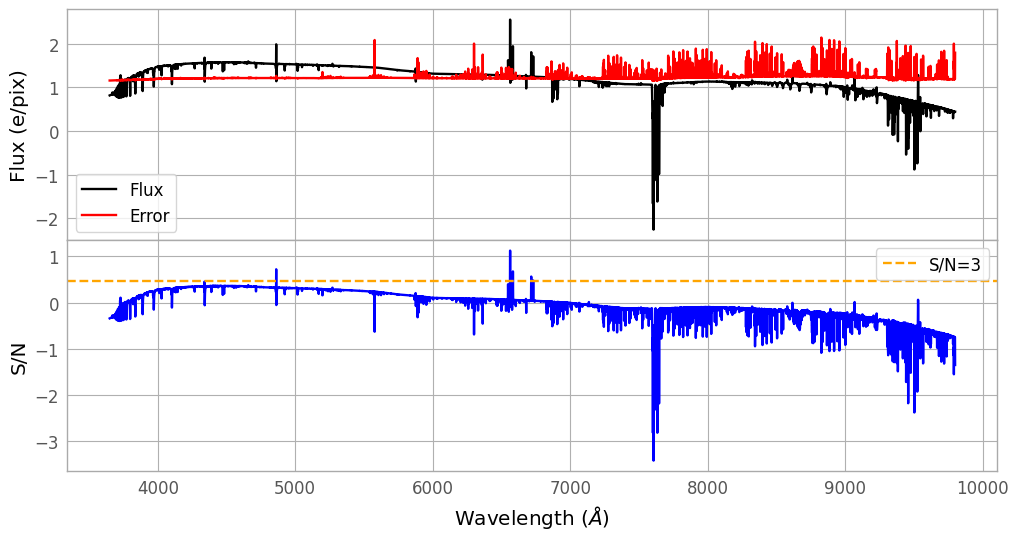

[INFO]: Deleting output directory



Elapsed time: 4.5s


[]

In [8]:
params = {'name': 'ETC_my_test_object',
          'nebula': neb_params,
          'star': star_params,
          'airmass': 1.2,
          'days_moon': 2,
          'exptimes': [900],
          'Av': 1
          }


run_lvm_etc(params, check_lines=[6563., 6717., 4861.], desired_snr=[30, 10, 15], continuum=False)

# Run ETC with user provided spectrum

We included in the ``run_lvm_etc`` function the possibility to run the simulator using a user provided spectrum. 

Instead of defining a source via the ``nebula`` or ``star`` parameters, it is possible to provide the name of a file containing the spectrum (``spectrum``) and a normalization factor (``norm``) that can be applied to it, if needed.
If a ``spectrum`` is provided, neither ``nebula`` nor ``star`` can be defined. 

The file containing the spectrum must be a 2 columns ascii file, where the first column is the wavelength (with a uniform sampling in linear units), and the second column is the spectrum that the user wants to simulate. The spectrum can be either in absolute units (erg/(cm2 s A arcsec2)) or normalized by the ``norm`` factor, in which case ``flux*units`` must be in erg/(cm2 s A arcsec2).


Let's try with an example. We will simulate the observation of a planetary nebula. The spectrum we are going to use is a Cloudy simulation of a nebula ionized by a central Kurucz stellar atmosphere at a temperature of 100k. The original file can be recovered from [here](https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/planetary-nebula-spectra). A version of the optical region of the spectrum converted to the correct format can be downloaded as follows:

``wget https://data.sdss5.org/resources/lvmdatasimulator/data/for_download/pn_spectrum_100k.dat``

The spectrum provided is the total flux of the PN and it is not in surface brightness units. To transform it in the proper units, we need to assume an angular size of the nebula and apply a scale factor to the spectrum. We can take advantage of the ``norm`` parameter to do this without having to work on the spectrum.

In this example, we assume that the nebula producing this spectrum is a sphere with a diameter of 0.5 pc and with constant surface brignthess which is located 1 kpc away from us. The nromalization factor can therefore be calulated as:

In [9]:
import numpy as np

diameter = 0.5  # in pc
distance = 1000  # in pc
diameter *= 206265/distance  # in arcsec

area = np.pi * diameter**2/4  #area covered by the nebulaù

norm = 1/area  # normalization factor 

We can now use the ``run_lvm_etc`` function to perform the simulation.

[INFO]: Start simulations in exposure time calculator mode for 1 custom spectrum.
[INFO]: Using only the central fiber.
[INFO]: Simulating real spectrum observation
[INFO]: Reading the atmospheric extinction from file.
[INFO]: Resample extinction file to instrument wavelength solution.
[INFO]: Simulating the sky emission 2 days from new moon.
[INFO]: Using sky file: /home/econgiu/Data/LVM/lvmdatasimulator/data/sky/LVM_LVM160_SKY_2.dat
[INFO]: Resample sky emission to instrument wavelength solution.
[INFO]: Saving the outputs:
[INFO]: Input spectra
[INFO]: ./ETC_custom_spec/outputs/ETC_custom_spec_linear_central_input.fits saved.
[INFO]: Clean outputs
[INFO]: ./ETC_custom_spec/outputs/ETC_custom_spec_linear_central_10_no_noise.fits saved.
[INFO]: ./ETC_custom_spec/outputs/ETC_custom_spec_linear_central_19_no_noise.fits saved.
[INFO]: ./ETC_custom_spec/outputs/ETC_custom_spec_linear_central_37_no_noise.fits saved.
[INFO]: ./ETC_custom_spec/outputs/ETC_custom_spec_linear_central_70_no_noi

To reach S/N=30 in line = 6563.0±1A we need 2138s of single exposure
To reach S/N=10 in line = 5007.0±1A we need 76s of single exposure


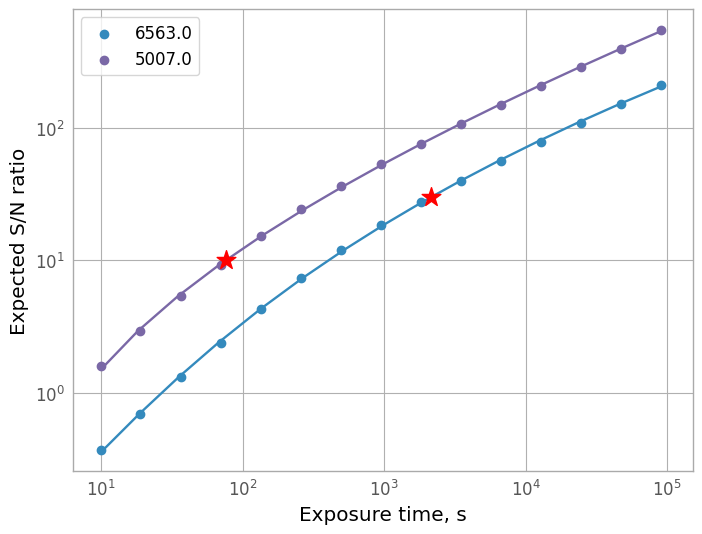

[INFO]: Deleting output directory



Elapsed time: 7.4s


[2138, 76]

In [10]:
params = {'name': 'ETC_custom_spec',
          'spectrum': './pn_spectrum_100k.dat',
          'norm': norm, 
          'airmass': 1.2,
          'days_moon': 2,
          }

run_lvm_etc(params, check_lines=[6563., 5007.], desired_snr=[30, 10], continuum=False)

### Warnings

When providing a spectrum, there are a few things to keep in mind:
- The spectrum should be uniformly sampled, and the wavelength array in linear units.
- If the spectrum does not cover the full wavelength range covered by the LVM, it is going to be extended via extrapolation.
- The simulator will convolve and resample the input spectrum during the simulation to produce a final oputput with a sampling off 0.5 aa/pix and an LSF with a FWHM of 1.5 AA. To obtain better results, we suggest to provide spectra with an higher sampling.  


### How to choose right "model_id"

Here is quick reminder on how to pick the model with the physical parameters you need. More details in tutorial #3


In [11]:
from lvmdatasimulator.utils import models_grid_summary
t = models_grid_summary('cloudy')  # All available models and their properties in astropy table
selection = (t['Z'] == 0.8) & (t['nH'] == 100) & (t['Geometry'] == 'Shell') & (t['qH'] == 50)
t[selection]

Model_ID,Geometry,Z,qH,LogLsun,Teff,nH,Rin,Rout,Nzones,Nlines,Distance,Flux_Ha,Source_model
str10,str5,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,str43
Shell_870,Shell,0.8,50.0,6.5,30000.0,100.0,10.01,10.66,103,141,50.0,4.372957193776309e-10,LVM_Cloudy_z0.80_l6.5_t30000_n100.0_r10.0
